In [10]:
data_path = "/data-restricted/home/cheick_ba/data_on_nas/raphtory/data"

In [11]:
data_path = "/Users/cheick/Pometry/data/"

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import raphtory as rp
import os
import pandas as pd

In [13]:
def get_top_k_nodes(metric_dict, k = 5):
    return dict(sorted(pg.items(), key=lambda x: x[1], reverse=True)[:5])

In [14]:
def plotting_function(metric_list, x, y, hue):
    df = pd.DataFrame(metric_list, columns=[x, y, hue])
    plt.figure(figsize=(12,8))
    plt.xticks(rotation=30)
    sns.lineplot(data=df, x="Time", y="PageRank", hue="node")

In [15]:
order_formatter = lambda n: "%d%s"%(n,{1:"st",2:"nd",3:"rd"}.get(n%100 if n%100<20 else n%10,"th"))

In [16]:
metric_list = []

In [17]:
dataset_path = os.path.join(data_path,"stablecoin")

loading from "/Users/cheick/Pometry/data/stablecoin/graphdb.bincode"
Loaded graph with 1 shards from encoded data files /Users/cheick/Pometry/data/stablecoin/graphdb.bincode with 1523333 vertices, 2814155 edges which took 2 seconds


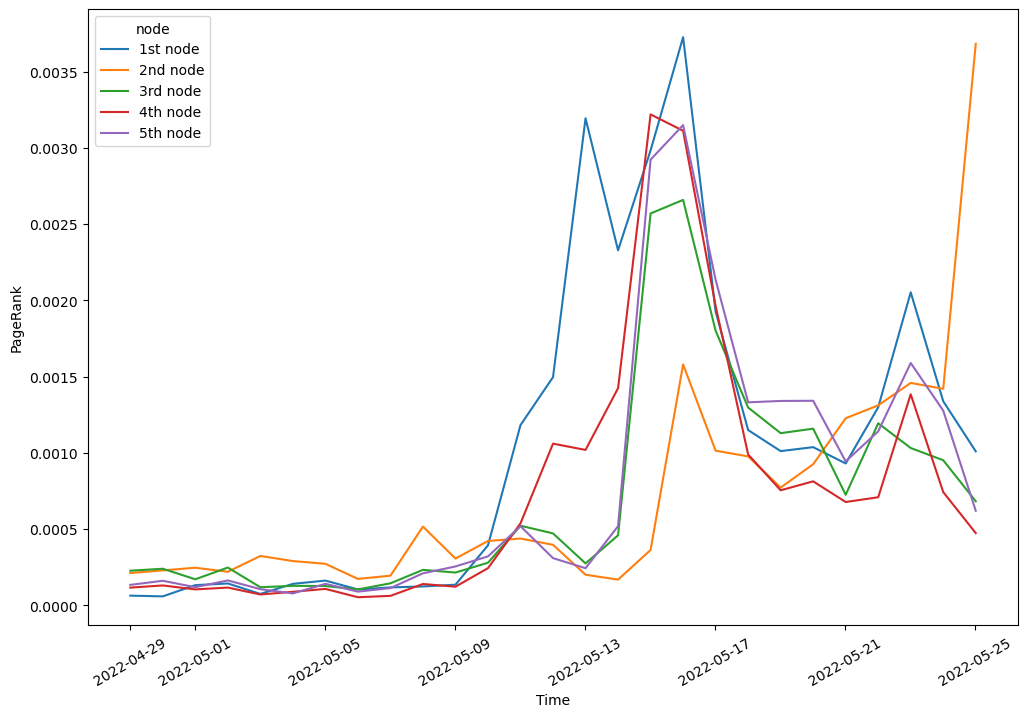

In [18]:
g = rp.graph_loader.stable_coin_graph(path = dataset_path, subset=True)
layer_graph = g.layer("LUNC")
pg = rp.algorithms.pagerank(g = layer_graph, iter_count=10)
top_5_nodes = get_top_k_nodes(metric_dict = pg, k = 5)

graph_views = layer_graph.rolling(window='1 day', step = "1 day") 
for viewG in graph_views:
    time = viewG.end_date_time()
    values = dict(rp.algorithms.pagerank(g=viewG, iter_count = 10))
    for i,n in enumerate(top_5_nodes):
        metric_list.append( (time, values[n], f"{order_formatter(i+1)} node" ) ) 

plotting_function(metric_list, x="Time", y="PageRank", hue="node")